**Project Description:** This project analyzes video game sales data from 2016 to identify patterns and trends that determine a game's success.  This information will be used to inform advertising campaign planning for 2017.  The data includes sales figures for different regions, platform information, genre classifications, user and critic reviews, and ESRB ratings.

**Project Goal:** To identify potentially successful video games based on historical data analysis, enabling the online store "Ice" to plan effective advertising campaigns for the coming year.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
# Opening the data file and studying the general information
df = pd.read_csv(r'C:\Users\vacoh\Downloads\games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Preparing the data & replacing the columns 
df.columns = df.columns.str.lower()

In [9]:
# Checking columns
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# checking for unique values in name, platform, genre and rating columns

columns_to_check = ['name', 'platform', 'genre', 'rating'] 

for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 20)

Unique values in 'name':
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
--------------------
Unique values in 'platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------
Unique values in 'genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
--------------------
Unique values in 'rating':
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
--------------------


In [11]:
# Handling missing values

# Name, Genre and Rating: Filled with 'Unknown' 
df['name'].fillna('Unknown', inplace=True)
df['genre'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
# critic_score, rating and user_score: Filled with 'NaN'
df['critic_score'].fillna('NaN', inplace=True)
df['user_score'].fillna('NaN', inplace=True)
# Remove rows with missing year_of_release (using dropna)
df.dropna(subset=['year_of_release'], inplace=True)
df = df.reset_index(drop=True)

C:\Users\vacoh\AppData\Local\Temp\ipykernel_22040\3038077274.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
C:\Users\vacoh\AppData\Local\Temp\ipykernel_22040\3038077274.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [12]:
# Converting data types
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Approximately 1.6% (269 rows) of the data had missing year_of_release values. Since the year_of_release is essential for time-series analysis, these rows were removed to ensure data integrity. This approach was chosen over imputation due to the small percentage of missing values and to avoid potential distortions that could arise from imputing release years.

In [13]:
# Checking for duplicates
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows (if any) - Keep the first occurrence
df.drop_duplicates(keep='first', inplace=True)

Number of duplicate rows: 0


In [14]:
# Calculate total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


*   **Duplicate Rows:** Duplicate rows were identified and removed, ensuring that each game is represented only once in the dataset.
*   **Total Sales:** A new column, `total_sales`, was calculated by summing sales across all regions for each game.

We now have a cleaner and more consistent dataset, ready for further exploratory analysis.  Our next steps will involve analyzing sales trends across platforms and genres, identifying potentially profitable platforms, and exploring the relationships between various game characteristics and sales performance.

Games Released per Year:
 year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


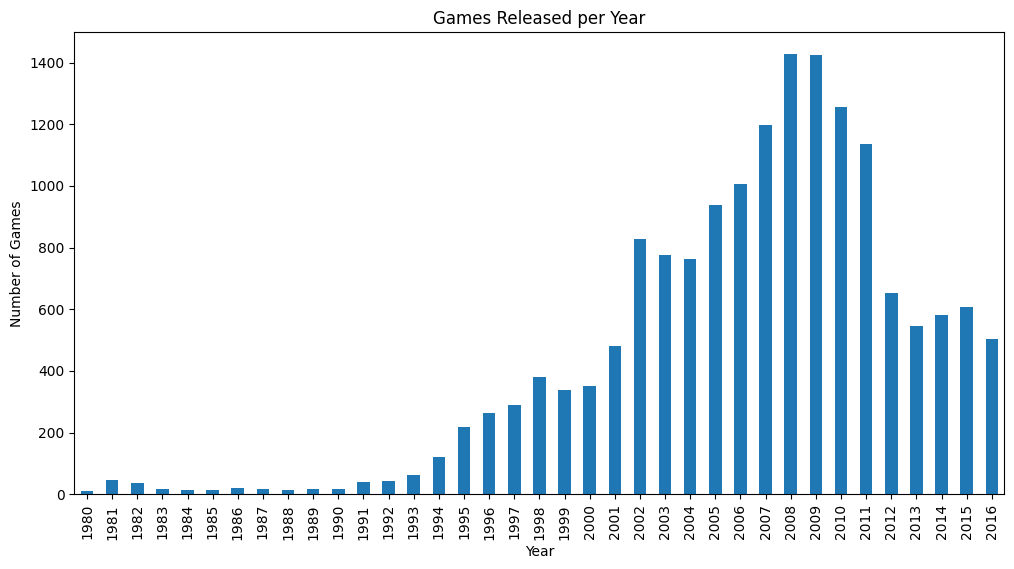

In [15]:
# Analyzing the data
# Games released per year
games_released = df.groupby('year_of_release')['name'].count()
print("Games Released per Year:\n", games_released)
games_released.plot(kind='bar', figsize=(12, 6))
plt.title('Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


Total Sales per Year (1994 onwards):
 year_of_release
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97
2003    357.54
2004    418.68
2005    457.82
2006    517.71
2007    604.75
2008    671.50
2009    658.82
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64


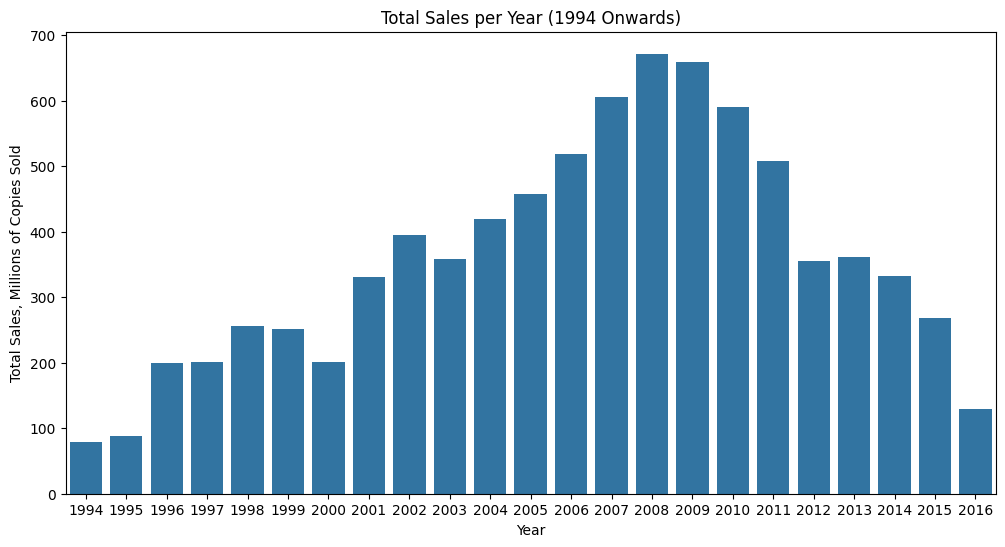

In [16]:
# Analyzing total sales per year (from 1994 onwards)
total_sales_per_year = df.query('year_of_release >= 1994').groupby('year_of_release')['total_sales'].sum()

print("\nTotal Sales per Year (1994 onwards):\n", total_sales_per_year)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_per_year.index, y=total_sales_per_year.values)
plt.title('Total Sales per Year (1994 Onwards)')  
plt.xlabel('Year')
plt.ylabel('Total Sales, Millions of Copies Sold')
plt.show()

Games Released per Year (All Years)

The bar chart clearly illustrates a **significant growth trend in the number of video game releases over time**.  From relatively low numbers in the early 1980s, there's a steady increase, with a particularly **sharp rise starting in the late 1990s and continuing through the 2000s**.  The chart indicates a **peak in releases around 2008-2011**, followed by a noticeable decline, though the release numbers in the later years still remain considerably higher than those in the earlier decades.

Total Sales per Year (1994 Onwards)

The chart reveals a fluctuating but generally upward trend in total game sales from 1994 to 2016.  We see a significant growth period starting in the early 2000s, with a peak around 2008 and 2009, coinciding with the height of popularity of several gaming platforms and potentially reflecting a broader adoption of gaming as a form of entertainment.  Following this peak, sales show a notable decline, then stabilize with some variability in the later years, suggesting a potential shift in consumer behavior or market saturation.

In [17]:
# Sales variation by platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\nOverall Platform Sales:\n", platform_sales)


Overall Platform Sales:
 platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


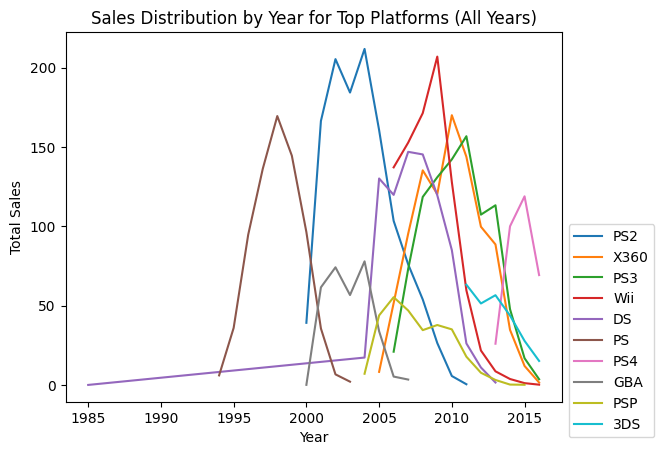

In [18]:
# Platform distribution by year
top_platforms = platform_sales.head(10).index
for platform in top_platforms:
    platform_data = df[df['platform'] == platform]
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    sales_by_year.plot(kind='line', label=platform)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Sales Distribution by Year for Top Platforms (All Years)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Sales Distribution by Year for Top Platforms (All Years)

This line chart visualizes the sales trends over time for the top 10 platforms with the highest overall sales. Several key observations can be made:

* **Dominance of PS2:** The PS2 clearly stands out as the best-selling platform, exhibiting a prolonged period of high sales, peaking in the mid-2000s. Its dominance is significantly greater than any other platform shown.

* **X360 and PS3 Competition:** The X360 and PS3 show a similar trajectory, rising in popularity in the mid-2000s and competing for market share. This reflects the intense competition between these platforms during that console generation.

* **Wii's Rise and Fall:** The Wii demonstrates a distinct rise and fall in sales, peaking in the late 2000s. This highlights the unique market impact of the Wii with its focus on motion gaming.

* **DS and PSP Portable Popularity:** The DS and PSP, representing the handheld market, also show significant sales, though generally lower than the top home consoles. Their sales are concentrated in the mid-2000s, reflecting the strength of the portable gaming market during that period.

* **Older Platforms Fading:** Platforms like the PS and GBA, which were dominant in earlier years, show a decline in sales as newer platforms emerge. This illustrates the cyclical nature of console generations.

* **More Recent Platforms Emerging:** Platforms like the PS4 and PC show growing sales towards the later years of the dataset, indicating their increasing market presence.


--- Relevant Period Analysis (2012-2016) ---


Platform Sales (2012-2016):
 platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Top 10 Platforms (2012-2016):
 platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64


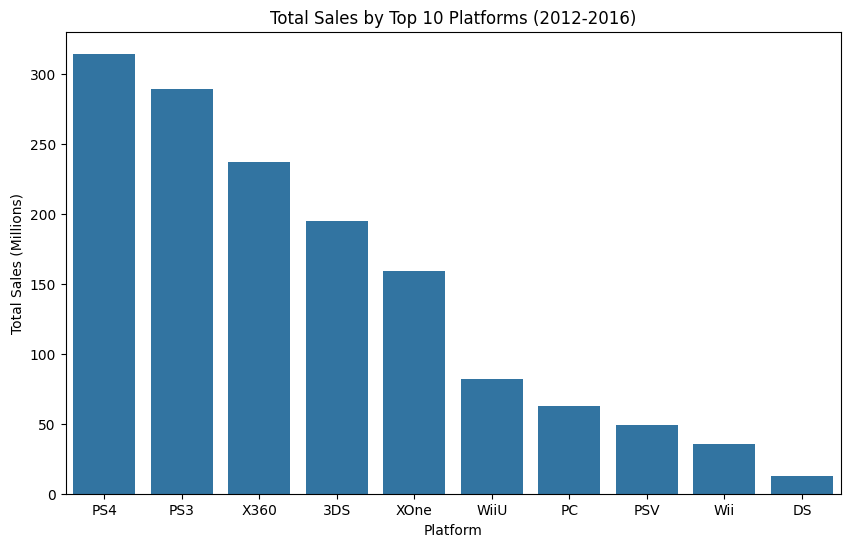


Platform Growth (Sales per Year):
 year_of_release    2012    2013    2014    2015   2016
platform                                              
3DS               51.36   56.57   43.76   27.78  15.14
DS                11.01    1.54     NaN     NaN    NaN
PC                23.22   12.38   13.28    8.52   5.25
PS3              107.36  113.25   47.76   16.82   3.60
PS4                 NaN   25.99  100.00  118.90  69.25
PSP                7.69    3.14    0.24    0.12    NaN
PSV               16.19   10.59   11.90    6.25   4.25
Wii               21.71    8.59    3.75    1.14   0.18
WiiU              17.56   21.65   22.03   16.35   4.60
X360              99.74   88.58   34.74   11.96   1.52
XOne                NaN   18.96   54.07   60.14  26.15

Platform Growth Percentage (2012-2016):
 platform
3DS    -70.521807
DS            NaN
PC     -77.390181
PS3    -96.646796
PS4           NaN
PSP           NaN
PSV    -73.749228
Wii    -99.170889
WiiU   -73.804100
X360   -98.476038
XOne          NaN


In [19]:
# --- Relevant Period Analysis (2012-2016) ---  # Revised time frame
print("\n--- Relevant Period Analysis (2012-2016) ---\n")

relevant_df = df.query('year_of_release >= 2012 and year_of_release <= 2016')  # Filter for 2012-2016

# Analyze platform sales
platform_sales = relevant_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\nPlatform Sales (2012-2016):\n", platform_sales)

# Identify top platforms 
top_platforms = platform_sales.head(10) 
print("\nTop 10 Platforms (2012-2016):\n", top_platforms)

# Visualize platform sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.title('Total Sales by Top 10 Platforms (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.show()


# Analyze platform growth (how their sales changed over time)
platform_growth = relevant_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

print("\nPlatform Growth (Sales per Year):\n", platform_growth)

# Identify growing and shrinking platforms 
if 2012 in platform_growth.columns and 2016 in platform_growth.columns:
    growth_percentage = ((platform_growth[2016] - platform_growth[2012]) / platform_growth[2012]) * 100
    print("\nPlatform Growth Percentage (2012-2016):\n", growth_percentage)

    growth_percentage = growth_percentage.dropna().sort_values(ascending=False)
    print("\nSorted Platform Growth Percentage (2012-2016):\n", growth_percentage)
else:
    print("Not enough data to calculate platform growth for the chosen period.")

**Relevant Period Analysis (2012-2016)**

This analysis examines game sales data from 2012 to 2016 to identify potentially profitable platforms for the following year (2017).  This 5-year window provides a balance between capturing recent trends and having sufficient data for analysis.

**Platform Sales (2012-2016):**

The top-selling platforms during this period, in descending order of total sales, are PS4, PS3, X360, 3DS, and XOne.  These platforms represent the major players in the console market during this time.

**Top 5 Platforms (2012-2016):**

As mentioned above, the top 5 platforms by sales volume are: PS4, PS3, X360, 3DS, and XOne.  The PS4 leads in sales, followed closely by the PS3, likely due to its longer market presence before the PS4's release.

**Platform Growth (Sales per Year):**

Analyzing the sales figures per year reveals the growth and decline of different platforms.  Notably, the PS4 shows significant growth over the years, while the PS3 and X360 show a clear decline, as expected as newer consoles replace older ones.  The 3DS also shows a decline in sales over this period.

**Platform Growth Percentage (2012-2016):**

Calculating the percentage change in sales between 2012 and 2016 highlights the growth trajectories more clearly.  Platforms like PS4 and XOne, which were not present or had limited sales in 2012, show `NaN` values for growth percentage as they did not have sales data for the entire period.  Of the platforms with data for both years, all show negative growth.  This indicates a general trend of declining sales for established platforms, likely due to shifting consumer preferences, and the lifecycle of console generations. The most substantial percentage decrease in sales is seen in the older generation consoles such as  Wii, X360, and PS3.

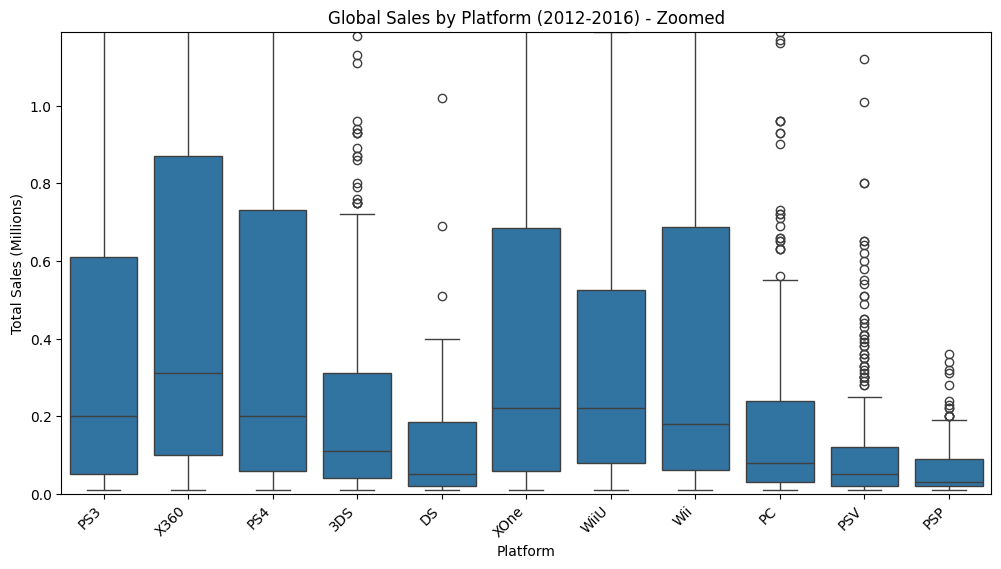

In [20]:
# Box plot for global sales by platform from 2012 onwards 
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_df)
plt.title('Global Sales by Platform (2012-2016) - Zoomed')  # Zoomed title
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')

# Set y-axis limits to focus on the lower values 
max_sales_limit = relevant_df['total_sales'].quantile(0.90)  
plt.ylim(0, max_sales_limit) 

plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Observation of Zoomed Box Plot and Total Sales Scale**

The zoomed box plot for global sales by platform (2012-2016) provides a clearer view of the sales distribution for most games, excluding extreme outliers.  By focusing on the lower range of sales values, we can better compare the typical sales performance across different platforms.

The scale on the "Total Sales" (y-axis) represents millions of copies sold. Thus, 0.2 on the scale corresponds to 200,000 copies, 0.4 corresponds to 400,000 copies, 0.6 corresponds to 600,000 copies, and so on.

**Specific Platform Observations:**

* **PS3 and X360:** These platforms exhibit a wide interquartile range (IQR, the box length), indicating a large variability in sales performance among games. The PS3, in particular, shows a higher median sales value compared to X360 within this zoomed scale.
* **PS4:** While PS4 had the highest overall sales (as seen in the earlier analysis), the zoomed box plot reveals a relatively concentrated sales distribution for most games, with a smaller IQR compared to PS3 and X360. This suggests that a large portion of PS4 titles sold within a closer range, though it also had some high-performing outliers that were not visible in this zoomed view.
* **3DS:** The 3DS shows a lower median sales value and a narrower IQR, indicating generally lower and less variable sales compared to the leading platforms.
* **WiiU:** Similar to 3DS, the WiiU demonstrates a lower median sales and a narrow IQR.
* **PC, PSV, Wii, DS, PSP:** These platforms show even lower median sales values and generally narrow IQRs, suggesting lower overall sales and less variability within their respective game libraries.

**General Observations:**

The zoomed box plot highlights the differences in typical sales performance across platforms, revealing that even within the lower sales range, there are significant variations.  The older generation consoles (PS3, X360) show a wider spread in sales, while newer platforms (PS4, XOne) and handheld consoles (3DS, WiiU, PSV, etc.) tend to have more concentrated sales distributions at the lower end.  This visualization complements the earlier analysis of total sales by providing a more granular view of sales distribution for the majority of games, excluding the influence of outliers.

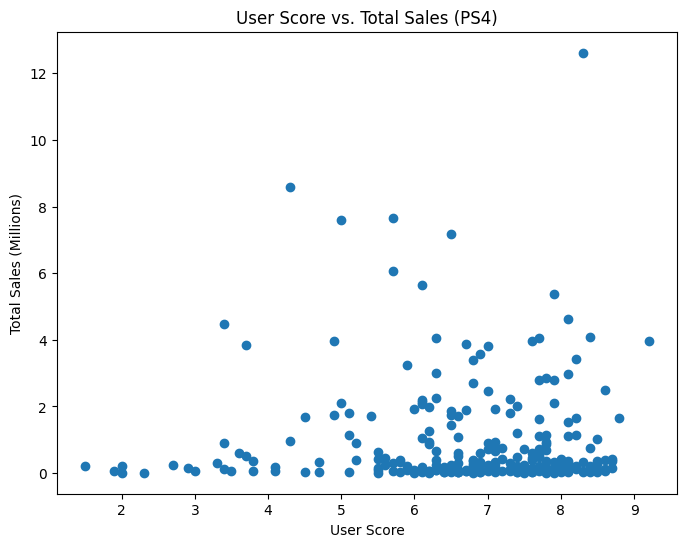

Correlation between User Score and Total Sales (PS4): -0.03195711020455643


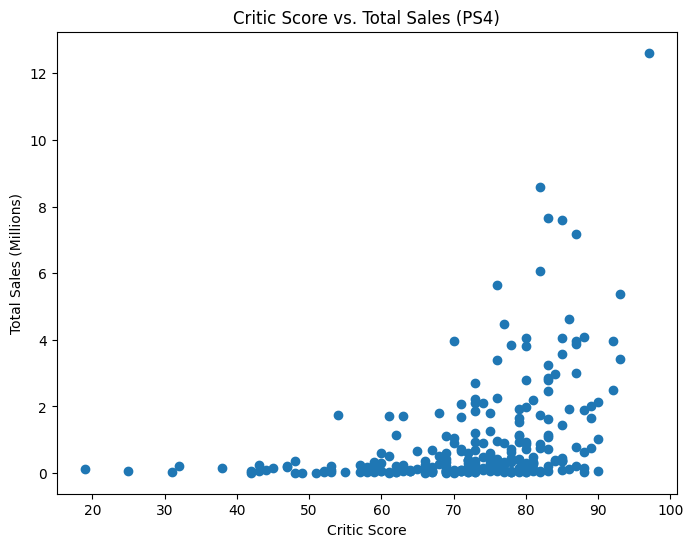

Correlation between Critic Score and Total Sales (PS4): 0.4065679020617816


In [21]:
# User/professional reviews vs. sales (PS4 example)
ps4_df = relevant_df[relevant_df['platform'] == 'PS4']
plt.figure(figsize=(8, 6))
plt.scatter(ps4_df['user_score'], ps4_df['total_sales'])
plt.title('User Score vs. Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()
print("Correlation between User Score and Total Sales (PS4):", ps4_df['user_score'].corr(ps4_df['total_sales']))

plt.figure(figsize=(8, 6))
plt.scatter(ps4_df['critic_score'], ps4_df['total_sales'])
plt.title('Critic Score vs. Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()
print("Correlation between Critic Score and Total Sales (PS4):", ps4_df['critic_score'].corr(ps4_df['total_sales']))

The correlation between User Score and Total Sales for PS4 games from 2012 onwards is -0.032. This indicates a very weak, almost negligible, negative correlation.  In practical terms, it suggests that there is essentially no relationship between user ratings and the total sales of PS4 games during this period.

The correlation between Critic Score and Total Sales for PS4 games from 2012 onwards is 0.407. This suggests a moderate positive correlation.  There's a tendency for games with higher critic scores to also have higher sales on the PS4. However, the correlation is not extremely strong, indicating that other factors besides critic reviews also play a significant role in determining a game's sales performance.


Sales Comparison for Top 10 Games on Other Platforms:
                        game_name  ps4_sales  \
0       Call of Duty: Black Ops 3      14.63   
1              Grand Theft Auto V      12.62   
2                         FIFA 16       8.58   
3    Star Wars Battlefront (2015)       7.98   
4  Call of Duty: Advanced Warfare       7.66   
5                         FIFA 17       7.60   
6                       Fallout 4       7.17   
7                         FIFA 15       6.08   
8                         Destiny       5.64   
9      Uncharted 4: A Thief's End       5.39   

                                other_platform_sales  
0  {'PC': 0.26, 'PS3': 1.69, 'PS4': 14.6299999999...  
1  {'PC': 1.1700000000000002, 'PS3': 21.05, 'PS4'...  
2  {'PC': 0.2, 'PS3': 2.6999999999999997, 'PS4': ...  
3            {'PC': 0.55, 'PS4': 7.98, 'XOne': 3.66}  
4  {'PC': 0.41000000000000003, 'PS3': 4.36, 'PS4'...  
5  {'PC': 0.12, 'PS3': 0.7300000000000001, 'PS4':...  
6  {'PC': 1.2800000000000002, '

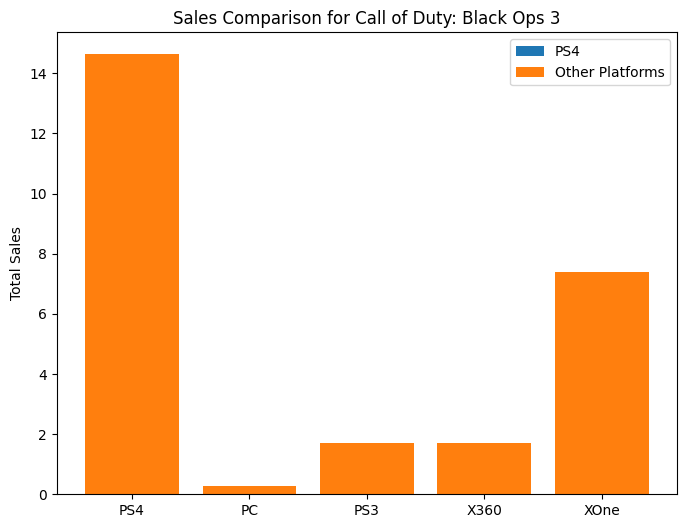

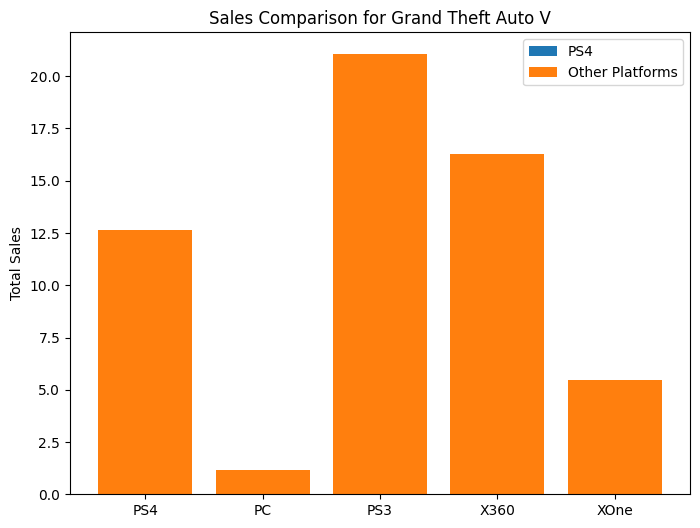

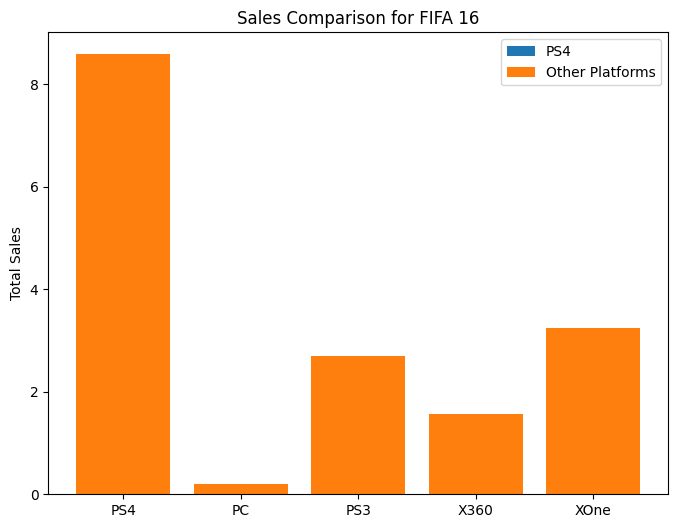

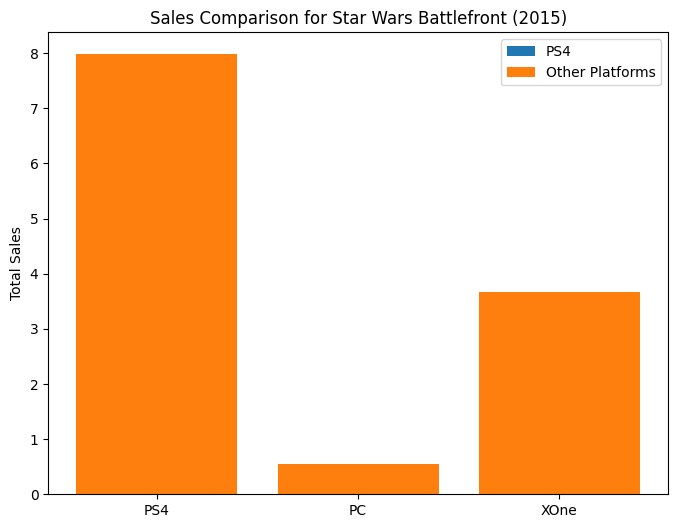

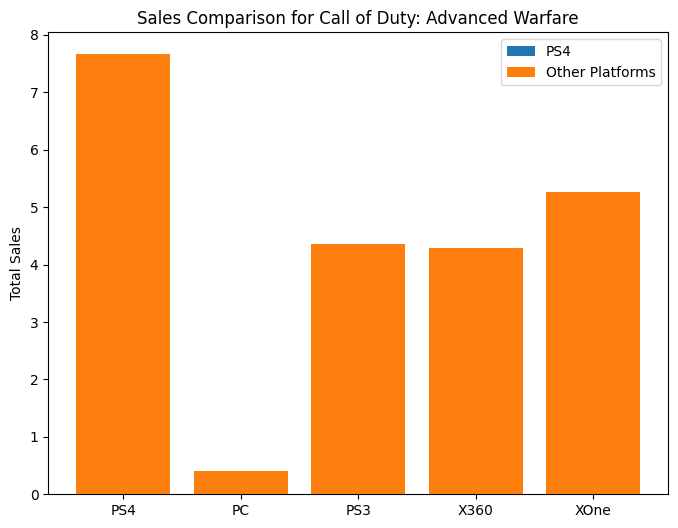

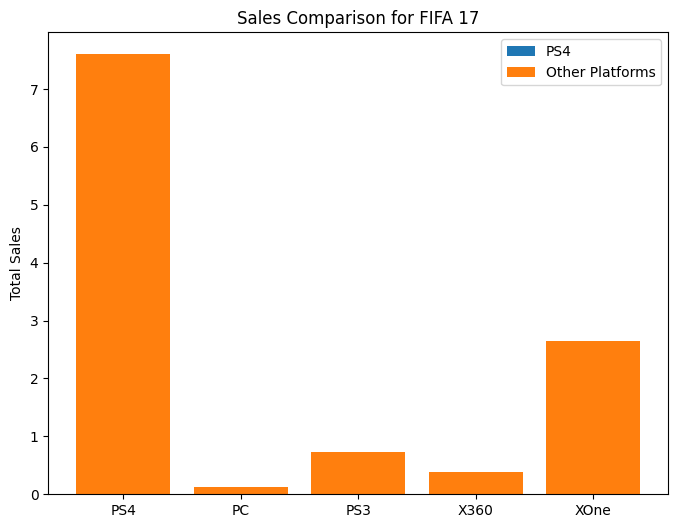

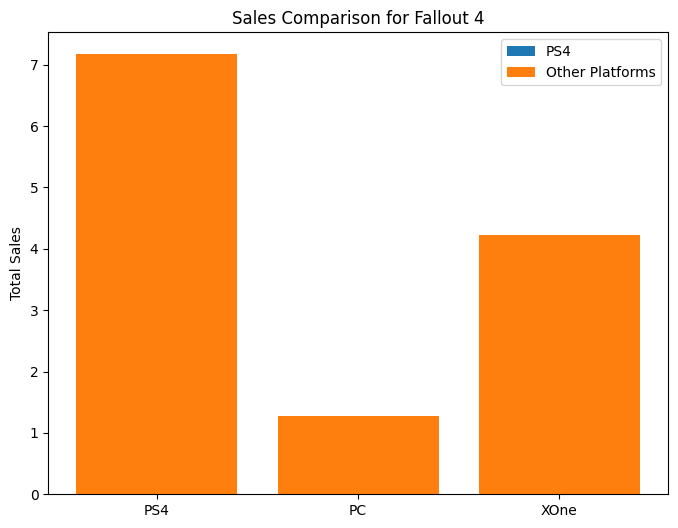

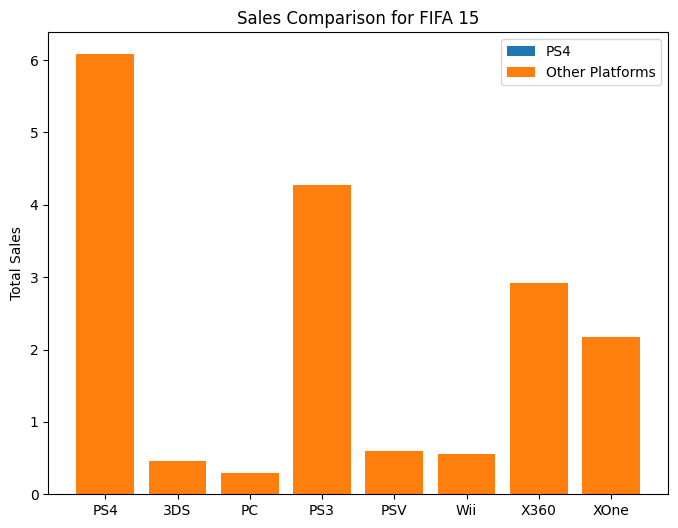

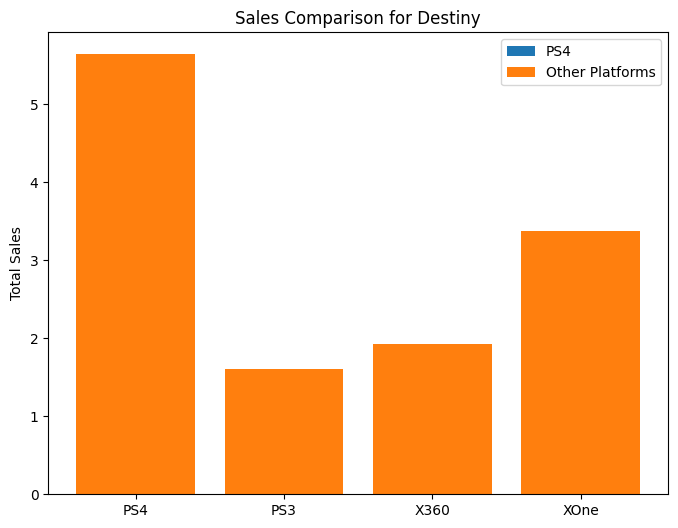

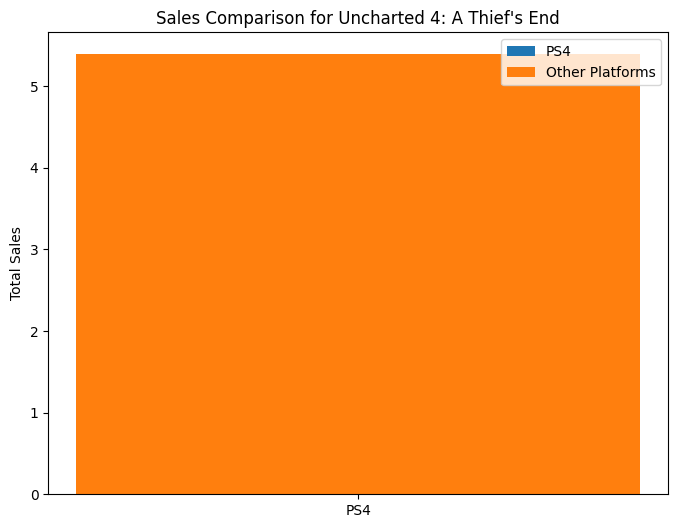

In [22]:
# Getting PS4 Sales for All Games 
ps4_game_sales = ps4_df.groupby('name')['total_sales'].sum().sort_values(ascending=False)

# Using Top 10 Game Names
top_10_games = ps4_game_sales.head(10).index  

# Creating Comparison Data for Top 10
comparison_data = []

for game_name in top_10_games:  
    ps4_sales = ps4_df[ps4_df['name'] == game_name]['total_sales'].sum()
    other_platform_sales = relevant_df[
        (relevant_df['name'] == game_name) & (relevant_df['platform'] != 'ps4')
    ].groupby('platform')['total_sales'].sum().to_dict()

    comparison_data.append({
        'game_name': game_name,
        'ps4_sales': ps4_sales,
        'other_platform_sales': other_platform_sales
    })

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Printing Comparison Data
print("\nSales Comparison for Top 10 Games on Other Platforms:")
print(comparison_df)  

# Plotting Sales Comparison (for Top 10)
for index, row in comparison_df.iterrows():
    game_name = row['game_name']
    ps4_sales = row['ps4_sales']
    other_sales = row['other_platform_sales']

    plt.figure(figsize=(8, 6))
    plt.bar(['PS4'], [ps4_sales], label='PS4')

    other_platforms = list(other_sales.keys())
    other_sales_values = list(other_sales.values())
    plt.bar(other_platforms, other_sales_values, label='Other Platforms')

    plt.title(f'Sales Comparison for {game_name}')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

The table and plots above show the sales comparison for the top 10 best-selling PS4 games, comparing their sales performance across other platforms. 

* **PS4 Dominance:** As expected, the PS4 versions of these games generally have the highest sales figures, confirming the platform's leading role for these titles.

* **Varying Multi-Platform Success:** The degree to which these games succeed on other platforms varies significantly. Some titles, like Grand Theft Auto V, demonstrate substantial sales on previous generation consoles (PS3, Xbox 360) and PC, indicating broader market penetration. Others, like Uncharted 4, appear to be primarily PS4-focused, with limited or no recorded sales on other platforms within this dataset.

* **PC Market:**  Many of the top 10 games also have PC versions, though their sales figures tend to be lower than the PS4 versions. This suggests that while PC is a relevant market, it's generally secondary to PS4 for these AAA titles.

* **Previous Generation Relevance:** The presence of PS3 and Xbox 360 sales for several games highlights the continued relevance of the older generation during the analyzed period. However, their sales are significantly less than PS4.

* **Franchise Strength:** The strong performance of franchises like Call of Duty and FIFA across multiple platforms underscores their broad appeal and cross-platform success.


Genre Sales (2012 Onwards):
 genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


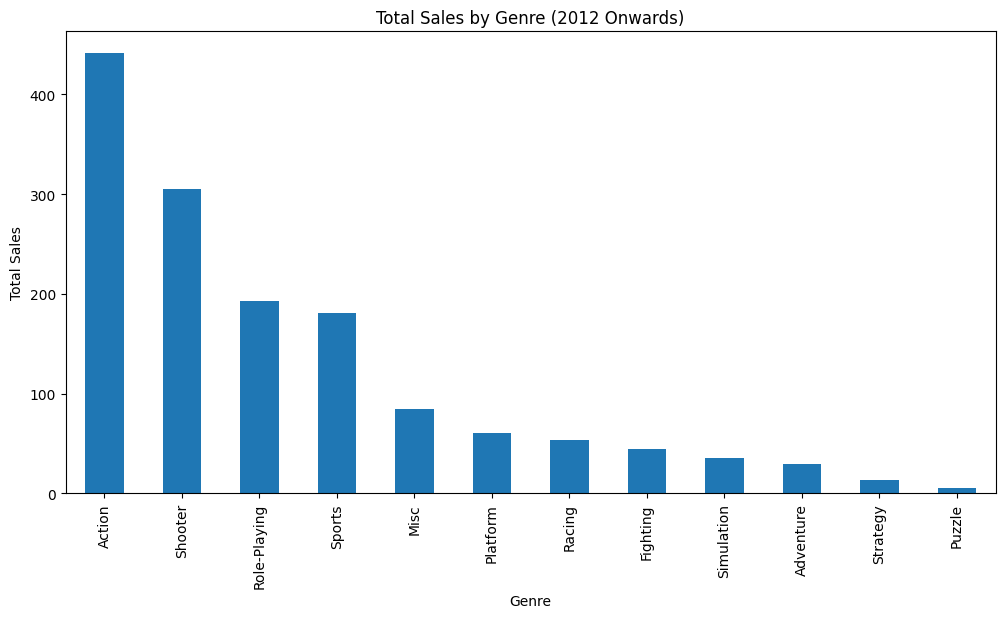

In [23]:
# Genre distribution
genre_sales = relevant_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nGenre Sales (2012 Onwards):\n", genre_sales)
genre_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Genre (2012 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

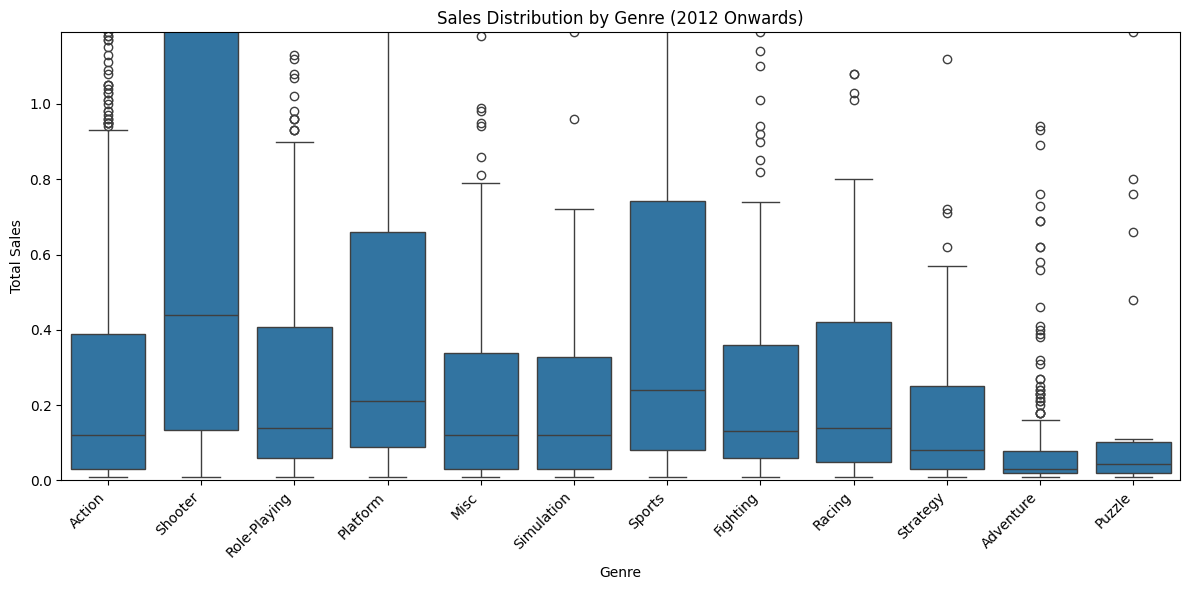


Genre Sales Statistics (2012 Onwards):
                count      mean       std   min    25%    50%     75%    max
genre                                                                      
Action        1031.0  0.427856  1.166504  0.01  0.030  0.120  0.3900  21.05
Adventure      302.0  0.097450  0.208237  0.01  0.020  0.030  0.0775   1.66
Fighting       109.0  0.408165  0.910385  0.01  0.060  0.130  0.3600   7.55
Misc           192.0  0.442917  1.081047  0.01  0.030  0.120  0.3375   9.18
Platform        85.0  0.717647  1.364413  0.01  0.090  0.210  0.6600   9.90
Puzzle          28.0  0.174643  0.305438  0.01  0.020  0.045  0.1025   1.19
Racing         115.0  0.465217  0.888664  0.01  0.050  0.140  0.4200   7.09
Role-Playing   370.0  0.521081  1.315937  0.01  0.060  0.140  0.4075  14.60
Shooter        235.0  1.296723  2.251662  0.01  0.135  0.440  1.4800  14.63
Simulation      80.0  0.439000  1.244500  0.01  0.030  0.120  0.3275   9.17
Sports         268.0  0.675634  1.136378  0.01 

In [24]:
# Genre distribution (using box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=relevant_df)  
plt.title('Sales Distribution by Genre (2012 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
max_sales_limit = relevant_df['total_sales'].quantile(0.90)  
plt.ylim(0, max_sales_limit) 
plt.tight_layout()
plt.show()

# Printing descriptive statistics for each genre
genre_stats = relevant_df.groupby('genre')['total_sales'].describe()
print("\nGenre Sales Statistics (2012 Onwards):\n", genre_stats)

The box plot visualizes the distribution of total sales for games across different genres from 2012 onwards.  Combined with the descriptive statistics table, we can make the following observations:

* **Genre Variability:** There's a wide range of sales performance across different genres. Some genres, like Shooter and Action, exhibit a larger spread in sales (as indicated by the wider boxes and higher standard deviations), suggesting a mix of both high-selling hits and lower-selling titles.  Other genres, like Puzzle and Strategy, show a much tighter distribution, suggesting more consistent, though generally lower, sales performance.

* **High-Performing Genres:** Shooter and Sports genres stand out with higher median sales values (the line within the box) and a significant number of outliers on the high end. This indicates that these genres have a higher potential for top-selling games.  Action and Role-Playing also demonstrate relatively strong sales performance.

* **Consistent Performers:** Genres like Platform and Fighting, while not reaching the same peak sales as Shooter or Sports, showcase relatively consistent sales performance, as suggested by their compact box plots and lower standard deviations.

* **Lower-Performing Genres:** Adventure, Puzzle, and Strategy genres have lower median sales and a smaller range, indicating generally lower sales potential compared to other genres.

* **Outliers:** The presence of outliers in several genres, particularly Shooter, Action, and Sports, signifies the existence of highly successful "blockbuster" games that significantly exceed the typical sales figures for their respective genres.

* **Skewness:**  The data for many genres appears to be positively skewed, meaning there are more games with lower sales and fewer games with very high sales. 

In [25]:
# User profile for each region
# --- Regional Analysis (All Years) ---
print("\n--- Regional Analysis (All Years) ---\n")

for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    print(f"\n--- {region.upper()} (All Years) ---")
    top_platforms_region = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)  
    print(f"Top 5 Platforms:\n{top_platforms_region}")
    top_genres_region = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)  
    print(f"Top 5 Genres:\n{top_genres_region}")

    esrb_sales = df.groupby('rating')[region].sum().sort_values(ascending=False)  
    print(f"ESRB Rating Impact on Sales:\n{esrb_sales}")


--- Regional Analysis (All Years) ---


--- NA_SALES (All Years) ---
Top 5 Platforms:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Top 5 Genres:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
ESRB Rating Impact on Sales:
rating
E          1274.24
Unknown    1227.62
T           747.60
M           742.89
E10+        345.50
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64

--- EU_SALES (All Years) ---
Top 5 Platforms:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Top 5 Genres:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64
ESRB Rating Impact on Sales:
rating
E          703.87
Unknown    610.18
M          480.00
T          421.79
E10

The regional analysis reveals distinct preferences in platform, genre, and ESRB rating across North America (NA), Europe (EU), and Japan (JP) across all years of data.

**North America:**

* **Platforms:** Xbox 360 (X360) leads in sales, followed closely by PlayStation 2 (PS2) and Wii. This suggests a strong preference for console gaming, particularly during the era when these platforms were dominant.
* **Genres:** Action games are by far the most popular, followed by Sports and Shooters. This aligns with broader trends in the global gaming market, where these genres often perform well.
* **ESRB Ratings:**  "E" (Everyone) rated games have the highest sales, followed by "Unknown" ratings.  The significant number of "Unknown" ratings might indicate a lack of consistent rating data for some games or perhaps a different approach to rating games in this region for some period. "T" (Teen) and "M" (Mature) rated games also contribute substantially to sales.

**Europe:**

* **Platforms:** PlayStation 2 (PS2) leads in Europe, followed by PlayStation 3 (PS3) and Xbox 360 (X360).  Similar to North America, console gaming is dominant.
* **Genres:** Action games are again the most popular, but Sports and Shooters are also highly favored. Racing games also show stronger sales in Europe compared to NA.
* **ESRB Ratings:** "E" rated games are the top sellers, followed by "Unknown" and "M" ratings. The distribution is similar to NA, with "Unknown" ratings being significant.

**Japan:**

* **Platforms:** Nintendo DS (DS) is the clear leader in Japan, followed by PlayStation (PS), PlayStation 2 (PS2), and SNES.  This demonstrates a strong preference for handheld consoles and Nintendo platforms in this region.
* **Genres:** Role-Playing games are overwhelmingly the most popular genre in Japan, significantly outperforming other genres. Action, Sports, and Platform games also contribute, but to a lesser extent.
* **ESRB Ratings:** "Unknown" ratings dominate sales in Japan. This could be due to differences in rating systems or data collection practices in Japan. "E" and "T" rated games are also sold, but in much smaller quantities.

**Overall Observations:**

* **Regional Differences:** Clear regional differences emerge.  Japan favors handheld consoles and Role-Playing games, while North America and Europe lean towards console gaming and Action/Sports genres.
* **Console Dominance:** Console platforms are generally the top performers across all regions, although handheld consoles have a strong presence in Japan.
* **Genre Preferences:** Action and Sports genres are consistently popular in North America and Europe. Role-Playing games are particularly dominant in Japan.
* **ESRB Rating Data:** The large proportion of "Unknown" ESRB ratings, particularly in Japan, suggests possible cultural differences in how games are rated or how that data is recorded.


--- NA_SALES (All Years) ---


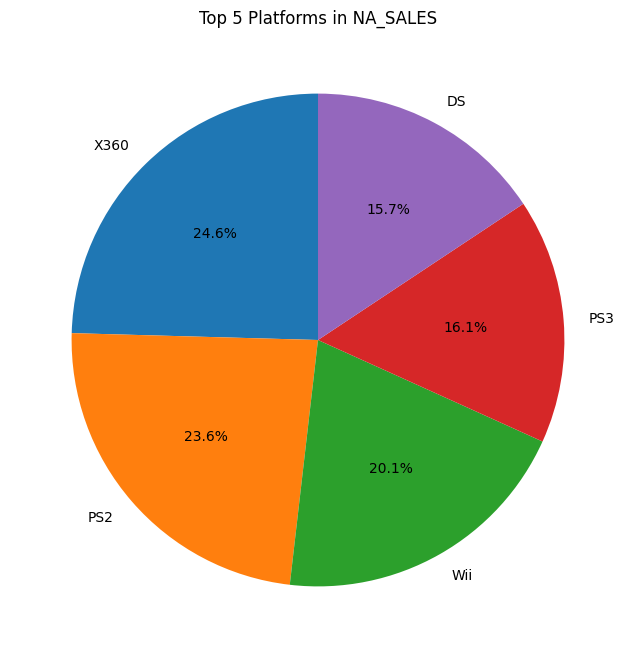


--- EU_SALES (All Years) ---


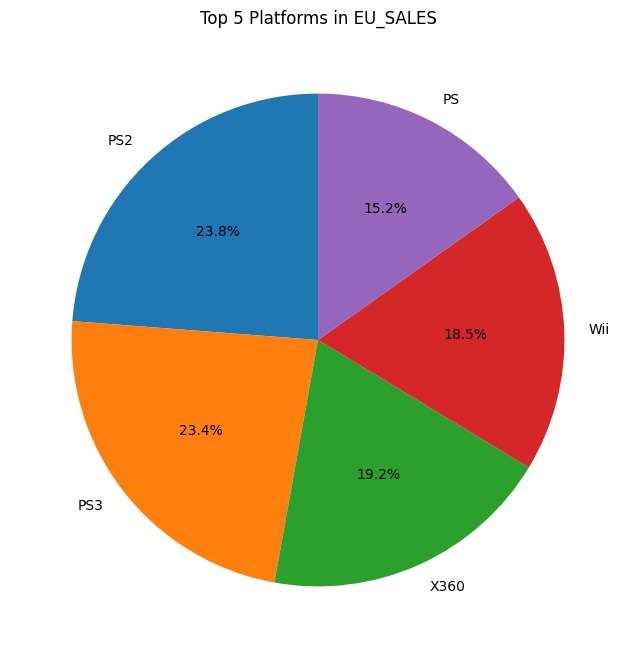


--- JP_SALES (All Years) ---


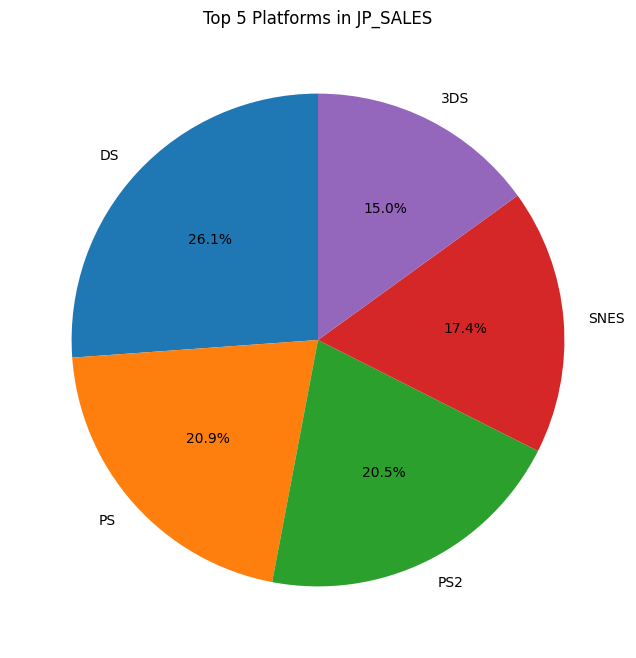

In [26]:
# Top Platforms (Pie Chart)
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\n--- {region.upper()} (All Years) ---")

    # Top Platforms (Pie Chart)
    top_platforms_region = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(8, 8))  # Adjust size as needed
    top_platforms_region.plot(kind='pie', autopct='%1.1f%%', startangle=90) #autopct formats percentage on chart
    plt.title(f"Top 5 Platforms in {region.upper()}")
    plt.ylabel("")  # Remove default y-axis label
    plt.show()


--- NA_SALES (All Years) ---


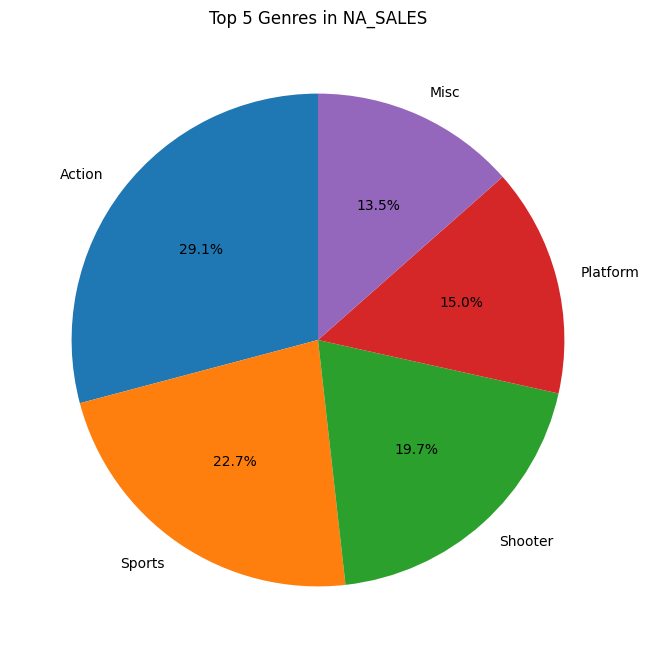


--- EU_SALES (All Years) ---


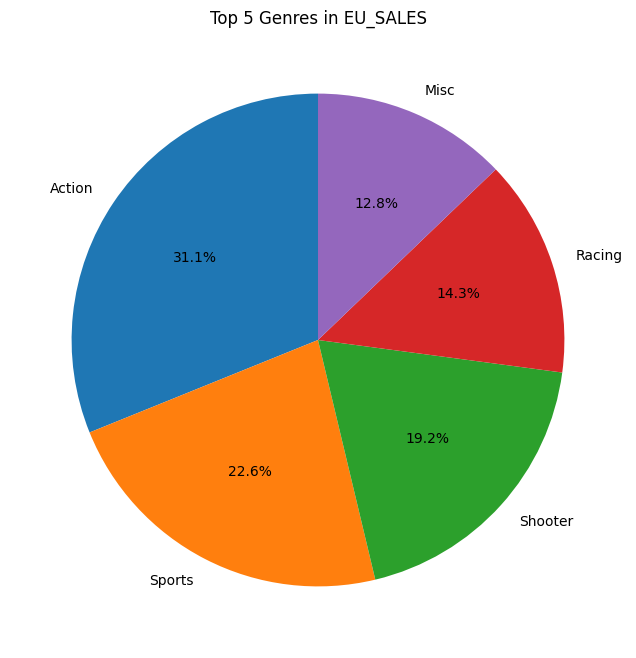


--- JP_SALES (All Years) ---


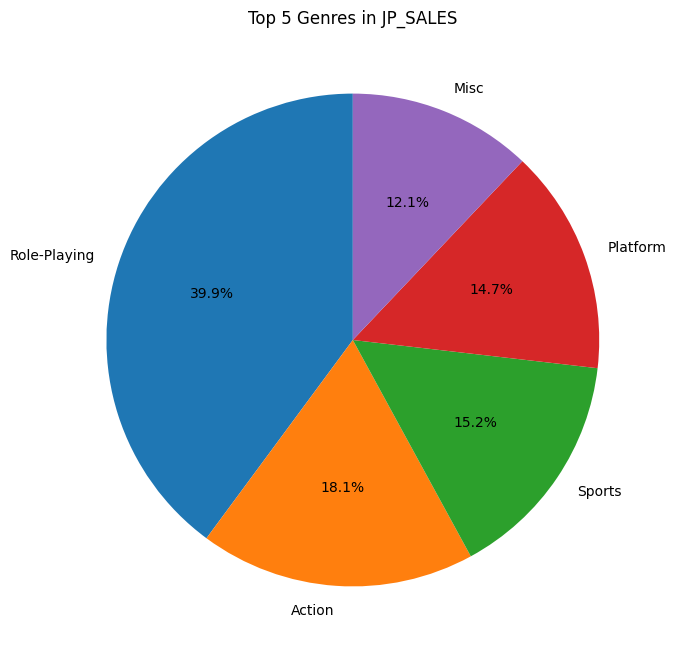

In [27]:
# Top Genres (Pie Chart)
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\n--- {region.upper()} (All Years) ---")

    top_genres_region = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(8, 8))
    top_genres_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 Genres in {region.upper()}")
    plt.ylabel("")
    plt.show()


--- NA_SALES (All Years) ---


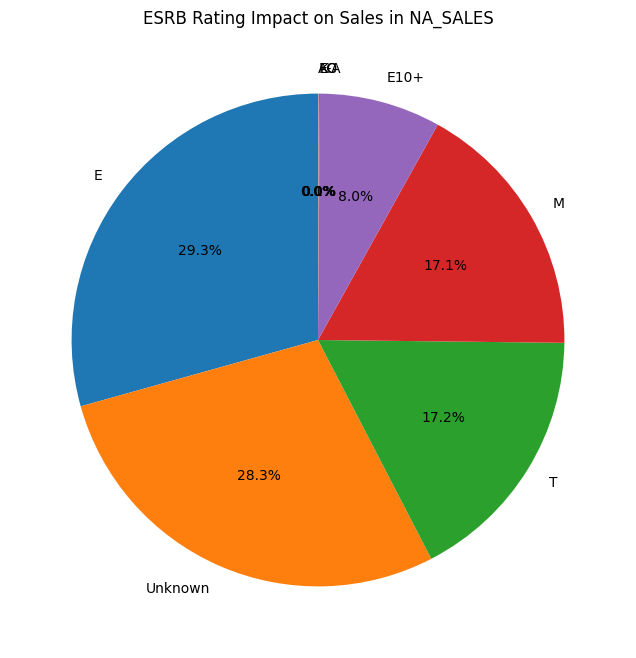


--- EU_SALES (All Years) ---


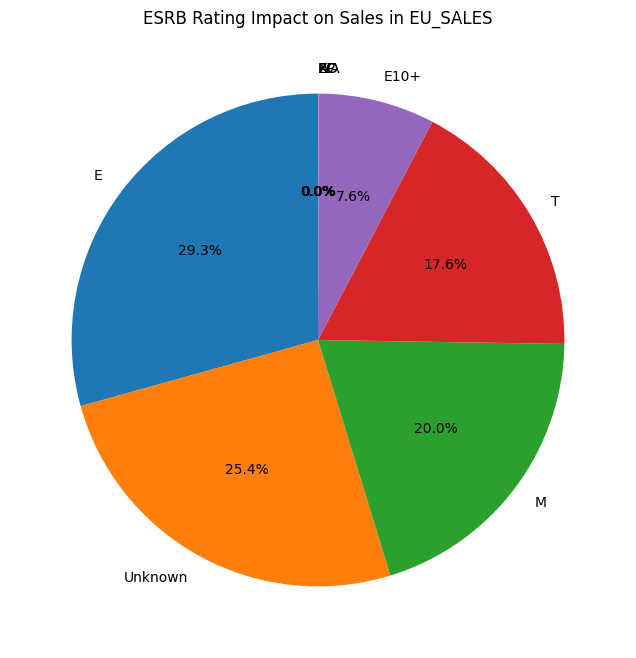


--- JP_SALES (All Years) ---


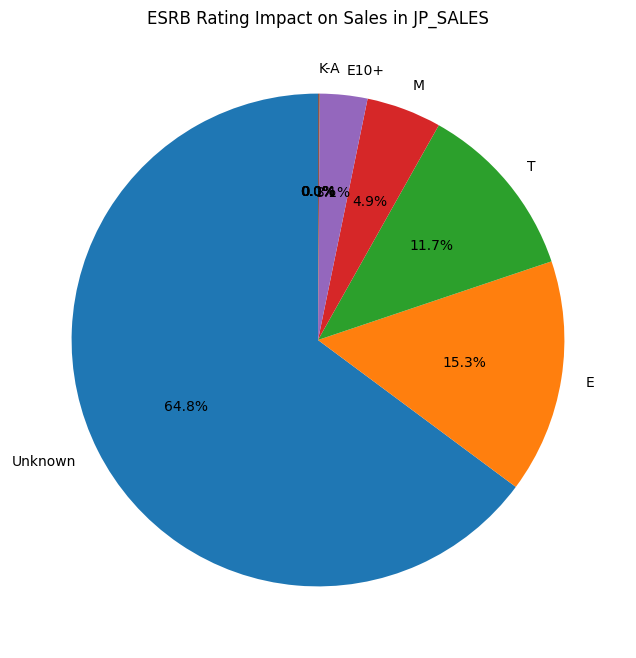

In [28]:
# ESRB Rating
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\n--- {region.upper()} (All Years) ---")
    esrb_sales = df.groupby('rating')[region].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 8))
    esrb_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"ESRB Rating Impact on Sales in {region.upper()}")
    plt.ylabel("")
    plt.show()

In [29]:
# --- Regional Analysis (2012 Onwards) ---
print("\n--- Regional Analysis (2012 Onwards) ---\n")

for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    print(f"\n--- {region.upper()} (2012 Onwards) ---")
    top_platforms_region_relevant = relevant_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 Platforms:\n{top_platforms_region_relevant}")
    top_genres_region_relevant = relevant_df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 Genres:\n{top_genres_region_relevant}")

    esrb_sales_relevant = relevant_df.groupby('rating')[region].sum().sort_values(ascending=False)
    print(f"ESRB Rating Impact on Sales:\n{esrb_sales_relevant}")


--- Regional Analysis (2012 Onwards) ---


--- NA_SALES (2012 Onwards) ---
Top 5 Platforms:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64
Top 5 Genres:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
ESRB Rating Impact on Sales:
rating
M          231.57
E          114.37
Unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

--- EU_SALES (2012 Onwards) ---
Top 5 Platforms:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64
Top 5 Genres:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
ESRB Rating Impact on Sales:
rating
M          193.96
E          113.03
Unknown     91.50
E10+        55.37
T           52.96
Name: eu_sal


--- NA_SALES (2012 Onwards) ---


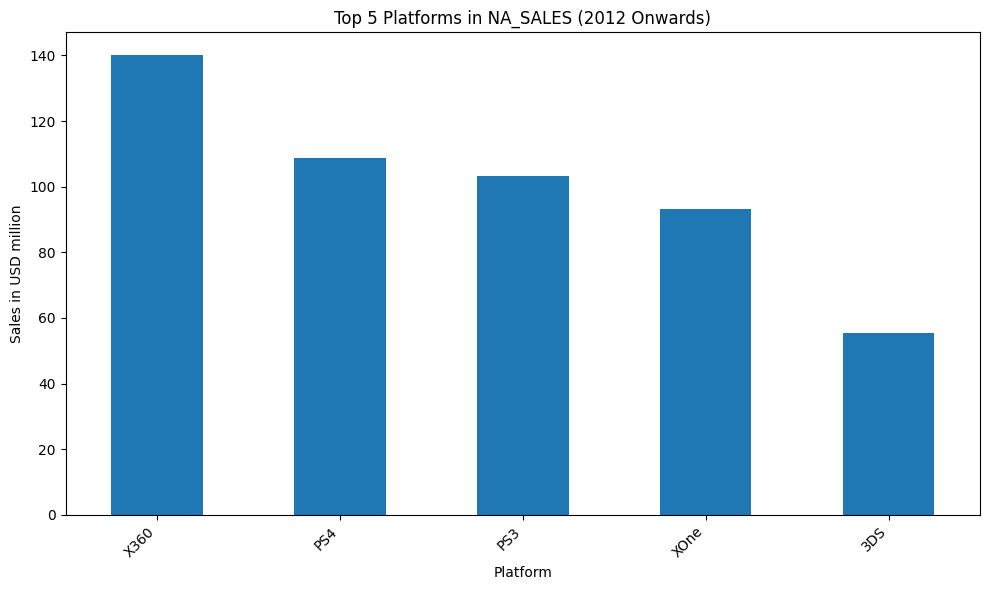


--- EU_SALES (2012 Onwards) ---


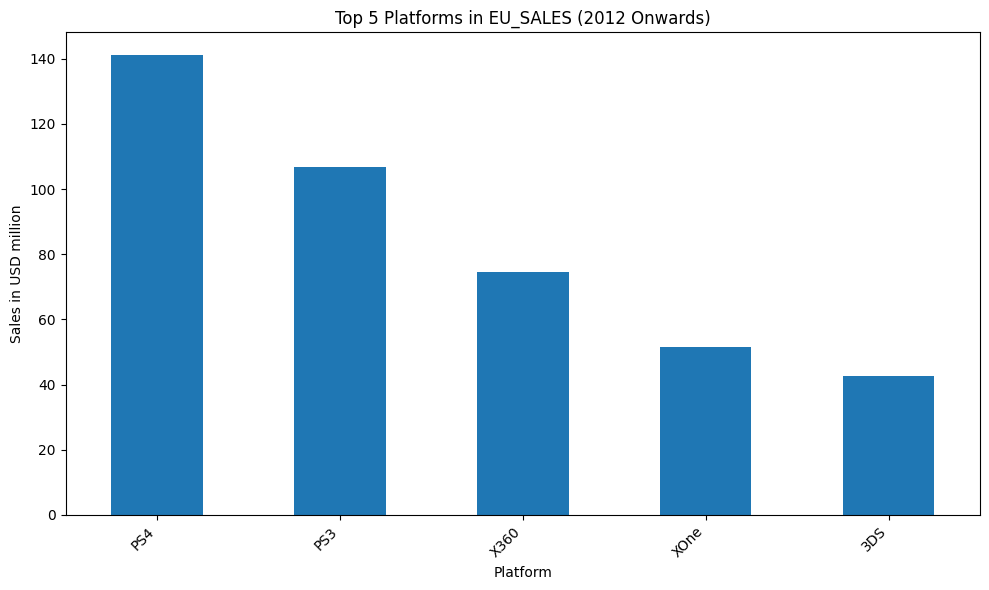


--- JP_SALES (2012 Onwards) ---


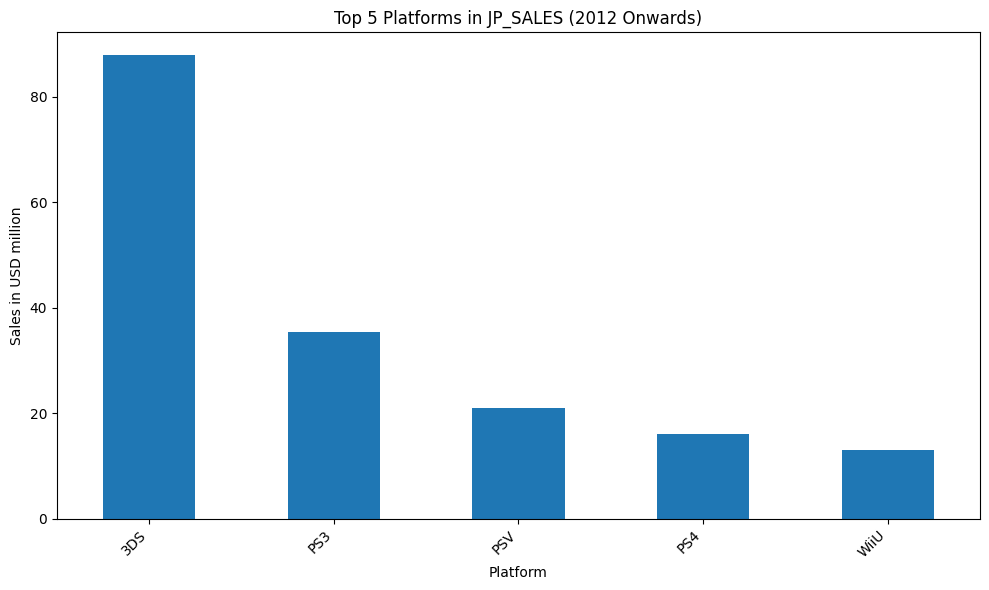

In [30]:
# Top Platforms (Bar Chart)
for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    print(f"\n--- {region.upper()} (2012 Onwards) ---")

    # Top Platforms (Bar Chart)
    top_platforms_region_relevant = relevant_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))  # Adjust size as needed
    top_platforms_region_relevant.plot(kind='bar')
    plt.title(f"Top 5 Platforms in {region.upper()} (2012 Onwards)")
    plt.xlabel("Platform")
    plt.ylabel("Sales in USD million")
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout() 
    plt.show()


--- NA_SALES (2012 Onwards) ---


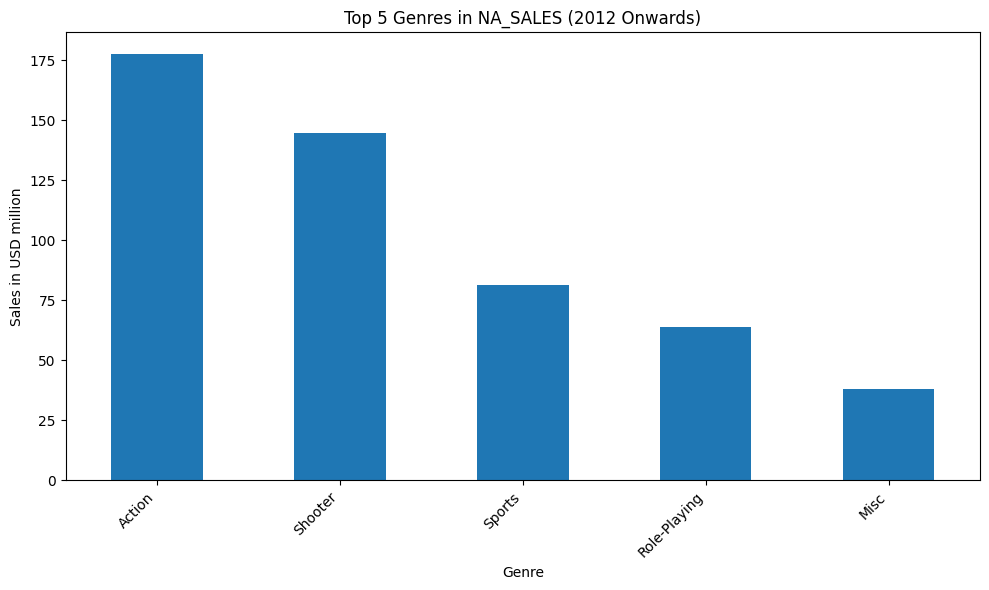


--- EU_SALES (2012 Onwards) ---


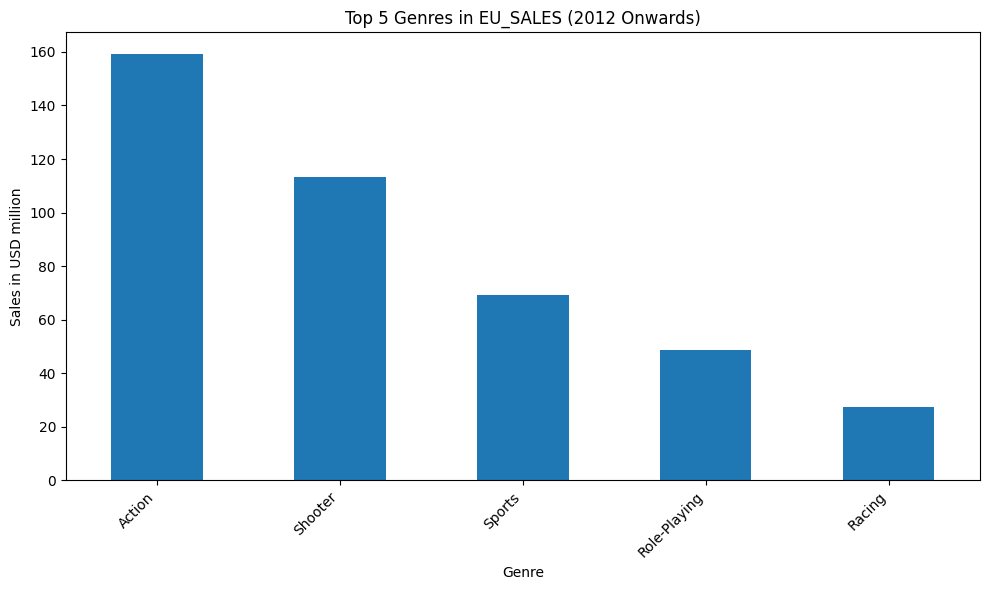


--- JP_SALES (2012 Onwards) ---


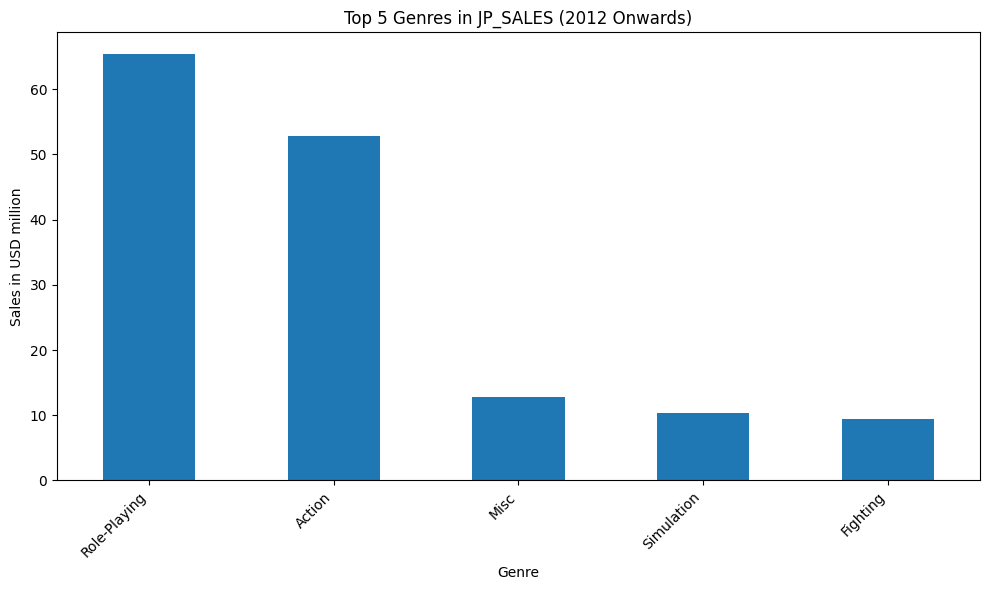

In [31]:
# Top Genres (Bar Chart)
for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    print(f"\n--- {region.upper()} (2012 Onwards) ---")
    top_genres_region_relevant = relevant_df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    top_genres_region_relevant.plot(kind='bar')
    plt.title(f"Top 5 Genres in {region.upper()} (2012 Onwards)")
    plt.xlabel("Genre")
    plt.ylabel("Sales in USD million")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- NA_SALES (2012 Onwards) ---


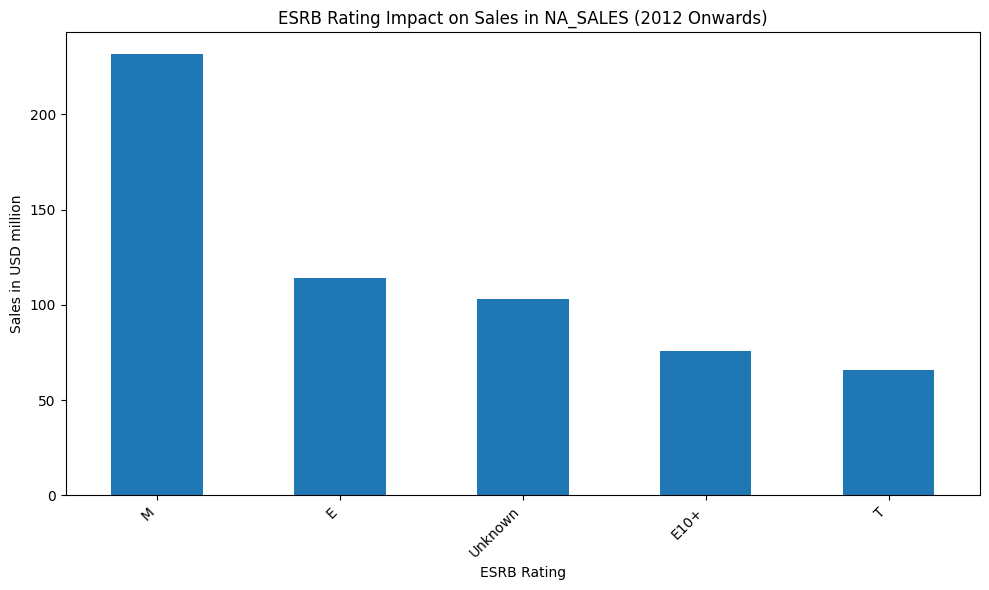


--- EU_SALES (2012 Onwards) ---


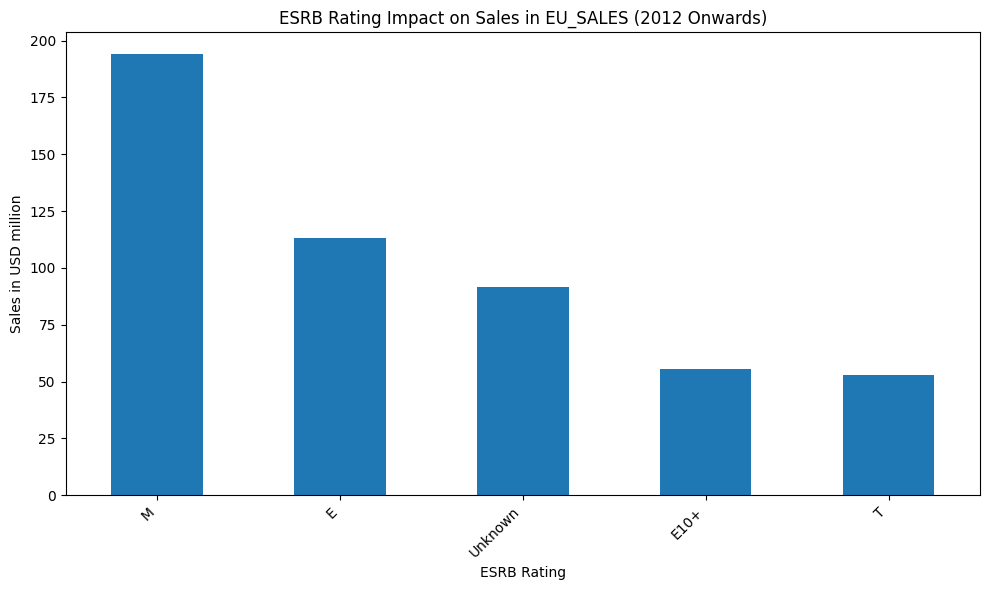


--- JP_SALES (2012 Onwards) ---


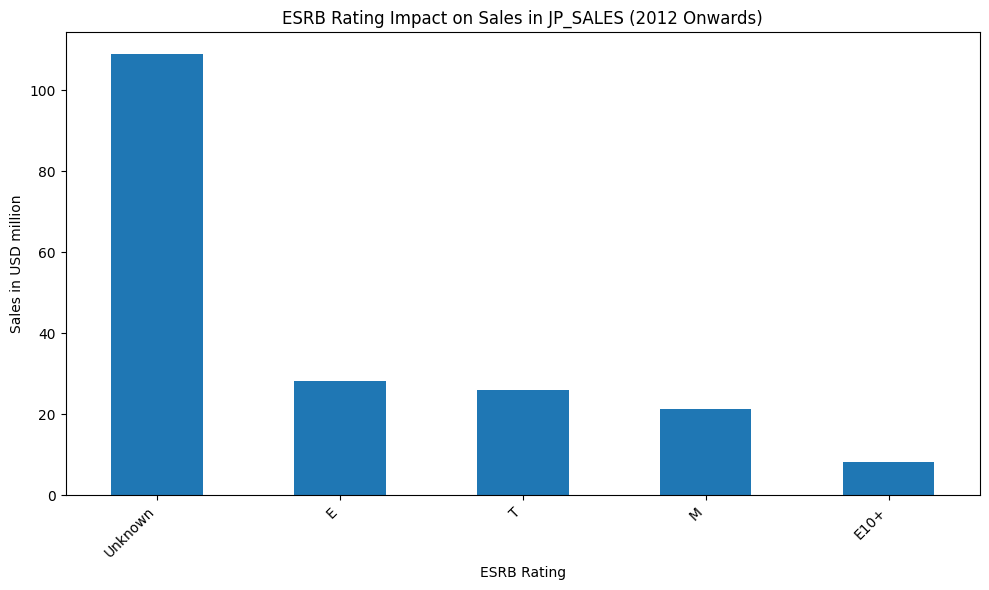

In [32]:
# ESRB Rating (Bar Chart)
for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    print(f"\n--- {region.upper()} (2012 Onwards) ---")
    esrb_sales_relevant = relevant_df.groupby('rating')[region].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    esrb_sales_relevant.plot(kind='bar')
    plt.title(f"ESRB Rating Impact on Sales in {region.upper()} (2012 Onwards)")
    plt.xlabel("ESRB Rating")
    plt.ylabel("Sales in USD million")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

The regional analysis for game sales from 2012 onwards reveals distinct market preferences across North America (NA), Europe (EU), and Japan (JP):

**North America (NA):**

* **Platforms:** Xbox 360 (X360) remains a popular platform, but the newer generation consoles, PlayStation 4 (PS4) and Xbox One (XOne), have a strong presence. PlayStation 3 (PS3) also shows significant sales. Nintendo 3DS (3DS) indicates continued interest in handheld gaming.
* **Genres:** Action and Shooter genres dominate the market, reflecting a global trend. Sports and Role-Playing games also contribute substantially to sales.
* **ESRB Ratings:** "M" (Mature) rated games lead in sales, followed by "E" (Everyone) and "Unknown" ratings. This suggests a significant market for games targeted at mature audiences.

**Europe (EU):**

* **Platforms:** Similar to North America, PlayStation 4 (PS4) is a leading platform, followed by PlayStation 3 (PS3) and Xbox 360 (X360). Xbox One (XOne) and 3DS also have a presence.
* **Genres:** Action and Shooter genres are again the most popular, though the sales figures are slightly lower than in NA. Sports and Role-Playing games maintain their popularity.
* **ESRB Ratings:** "M" (Mature) rated games also lead in Europe, followed by "E" (Everyone) and "Unknown" ratings, mirroring the NA trend.

**Japan (JP):**

* **Platforms:** Nintendo 3DS (3DS) is the top platform, emphasizing the continued strength of handheld gaming in Japan. PlayStation 3 (PS3), PlayStation Vita (PSV), PlayStation 4 (PS4), and Wii U also contribute to sales.
* **Genres:** Role-Playing games are the most popular genre, a long-standing trend in Japan. Action games are also popular, but their sales are significantly less than Role-Playing.
* **ESRB Ratings:** "Unknown" ratings are the most prevalent, possibly due to differences in rating systems or data collection in Japan. "E" (Everyone) and "T" (Teen) rated games also have some sales presence.

**Key Observations (2012 Onwards):**

* **Handheld vs. Consoles:** While consoles are important in NA and EU, handheld consoles, particularly the 3DS, are dominant in Japan.
* **Genre Trends:** Action and Shooter genres are strong in NA and EU, while Role-Playing games are particularly dominant in Japan.
* **Mature Content:** "M" rated games have the highest sales in NA and EU, indicating a substantial market for mature content.
* **Regional Differences:** Clear regional differences are evident, with Japan exhibiting a stronger preference for handheld consoles and Role-Playing games compared to NA and EU.

In [33]:
# --- Hypothesis Testing (2012 Onwards - relevant_df) ---
print("\n--- Hypothesis Testing (2012 Onwards) ---\n")

alpha = 0.05  # Significance level

# Hypothesis 1: Average user ratings of Xbox One and PC are the same (2012 Onwards)

# Null Hypothesis (H0): Average user ratings of Xbox One and PC are the same.
# Alternative Hypothesis (H1): Average user ratings of Xbox One and PC are different.

xbox_one_ratings_2012 = relevant_df[relevant_df['platform'] == 'XOne']['user_score']
pc_ratings_2012 = relevant_df[relevant_df['platform'] == 'PC']['user_score']

t_statistic_1_2012, p_value_1_2012 = stats.ttest_ind(xbox_one_ratings_2012, pc_ratings_2012, equal_var=False, nan_policy='omit')

print(f"Hypothesis 1 (2012 Onwards): T-statistic: {t_statistic_1_2012}, P-value: {p_value_1_2012}")

if p_value_1_2012 < alpha:
    print("We reject the null hypothesis. Average user ratings for Xbox One and PC are different (2012 Onwards).")
else:
    print("We fail to reject the null hypothesis. Average user ratings for Xbox One and PC are the same (2012 Onwards).")


# Hypothesis 2: Average user ratings for Action and Sports genres are different (2012 Onwards)

# Null Hypothesis (H0): Average user ratings for Action and Sports genres are the same.
# Alternative Hypothesis (H1): Average user ratings for Action and Sports genres are different.

action_ratings_2012 = relevant_df[relevant_df['genre'] == 'Action']['user_score']
sports_ratings_2012 = relevant_df[relevant_df['genre'] == 'Sports']['user_score']

t_statistic_2_2012, p_value_2_2012 = stats.ttest_ind(action_ratings_2012, sports_ratings_2012, equal_var=False, nan_policy='omit')

print(f"Hypothesis 2 (2012 Onwards): T-statistic: {t_statistic_2_2012}, P-value: {p_value_2_2012}")

if p_value_2_2012 < alpha:
    print("We reject the null hypothesis. Average user ratings for Action and Sports genres are different (2012 Onwards).")
else:
    print("We fail to reject the null hypothesis. Average user ratings for Action and Sports genres are the same (2012 Onwards).")


--- Hypothesis Testing (2012 Onwards) ---

Hypothesis 1 (2012 Onwards): T-statistic: 0.5998585993590415, P-value: 0.5489537965134912
We fail to reject the null hypothesis. Average user ratings for Xbox One and PC are the same (2012 Onwards).
Hypothesis 2 (2012 Onwards): T-statistic: 9.903191188722607, P-value: 4.24307776572644e-20
We reject the null hypothesis. Average user ratings for Action and Sports genres are different (2012 Onwards).


The hypothesis testing conducted on game data from 2012 onwards yields the following observations:

**Hypothesis 1 (Xbox One vs. PC User Ratings):**

The t-statistic of 0.60 and a p-value of 0.55 indicate that there is no statistically significant difference between the average user ratings for games on the Xbox One and PC platforms.  Since the p-value is much greater than the chosen alpha level of 0.05, we fail to reject the null hypothesis.  This suggests that, based on the available data, user ratings for games released on these two platforms from 2012 onwards are statistically similar.

**Hypothesis 2 (Action vs. Sports Genre User Ratings):**

The t-statistic of 9.90 and a p-value of 4.24e-20 (a very small number) demonstrate a statistically significant difference between the average user ratings for games in the Action and Sports genres.  Because the p-value is far less than the alpha level of 0.05, we reject the null hypothesis. This strongly suggests that, from 2012 onwards, user ratings for games in these two genres are not the same; the data provides compelling evidence that they are different.

In [34]:
# --- Hypothesis Testing (All Years - original df) ---
print("\n--- Hypothesis Testing (All Years) ---\n")

alpha = 0.05  # Significance level

# Hypothesis 1: Average user ratings of Xbox One and PC are the same (All Years)

# Null Hypothesis (H0): Average user ratings of Xbox One and PC are the same.
# Alternative Hypothesis (H1): Average user ratings of Xbox One and PC are different.

xbox_one_ratings_all = df[df['platform'] == 'XOne']['user_score']
pc_ratings_all = df[df['platform'] == 'PC']['user_score']

t_statistic_1_all, p_value_1_all = stats.ttest_ind(xbox_one_ratings_all, pc_ratings_all, equal_var=False, nan_policy='omit')

print(f"Hypothesis 1 (All Years): T-statistic: {t_statistic_1_all}, P-value: {p_value_1_all}")

if p_value_1_all < alpha:
    print("We reject the null hypothesis. Average user ratings for Xbox One and PC are different (All Years).")
else:
    print("We fail to reject the null hypothesis. Average user ratings for Xbox One and PC are the same (All Years).")


# Hypothesis 2: Average user ratings for Action and Sports genres are different (All Years)

# Null Hypothesis (H0): Average user ratings for Action and Sports genres are the same.
# Alternative Hypothesis (H1): Average user ratings for Action and Sports genres are different.

action_ratings_all = df[df['genre'] == 'Action']['user_score']
sports_ratings_all = df[df['genre'] == 'Sports']['user_score']

t_statistic_2_all, p_value_2_all = stats.ttest_ind(action_ratings_all, sports_ratings_all, equal_var=False, nan_policy='omit')

print(f"Hypothesis 2 (All Years): T-statistic: {t_statistic_2_all}, P-value: {p_value_2_all}")

if p_value_2_all < alpha:
    print("We reject the null hypothesis. Average user ratings for Action and Sports genres are different (All Years).")
else:
    print("We fail to reject the null hypothesis. Average user ratings for Action and Sports genres are the same (All Years).")


--- Hypothesis Testing (All Years) ---

Hypothesis 1 (All Years): T-statistic: -4.671113961085972, P-value: 4.5385802963771835e-06
We reject the null hypothesis. Average user ratings for Xbox One and PC are different (All Years).
Hypothesis 2 (All Years): T-statistic: 1.789373351094851, P-value: 0.07370217419278526
We fail to reject the null hypothesis. Average user ratings for Action and Sports genres are the same (All Years).


The hypothesis testing conducted on game data across all years yields the following observations:

**Hypothesis 1 (Xbox One vs. PC User Ratings - All Years):**

The t-statistic of -4.67 and a p-value of 4.54e-06 (a very small number) indicate a statistically significant difference between the average user ratings for games on the Xbox One and PC platforms across all years. Because the p-value is much smaller than the chosen alpha level of 0.05, we reject the null hypothesis.  This suggests that, considering all years of data, user ratings for games released on these two platforms are statistically different.

**Hypothesis 2 (Action vs. Sports Genre User Ratings - All Years):**

The t-statistic of 1.79 and a p-value of 0.074 indicate that there is no statistically significant difference between the average user ratings for games in the Action and Sports genres across all years.  Since the p-value is greater than the alpha level of 0.05, we fail to reject the null hypothesis. This suggests that, based on the available data across all years, user ratings for games in these two genres are statistically similar.

# General Conclusion

This project aimed to identify patterns that determine video game success, using data from 2016 and earlier.  Our analysis revealed several key insights:

**Data Preparation and Exploration:**  The initial data cleaning and preparation steps, including handling missing values and converting data types, were crucial for accurate analysis.  Exploratory data analysis revealed trends in game releases over time, platform popularity shifts, and the influence of reviews and genre on sales.

**Platform and Genre Analysis:**  We observed significant variations in sales across different platforms and genres.  Platform popularity evolves, with older platforms declining and newer ones emerging.  Certain genres, such as Action and Shooter, tend to perform well, while others, like Puzzle and Strategy, have more niche appeal. Box plot visualizations provided a clearer picture of sales distribution within each genre, highlighting the importance of considering median sales and the spread of data rather than solely relying on total sales.

**Regional Analysis:**  Regional preferences for platforms, genres, and ESRB ratings were evident.  North America and Europe showed similarities in platform and genre preferences, while Japan exhibited a stronger inclination towards handheld consoles and Role-Playing games.  Data quality issues, particularly the high number of "Unknown" ESRB ratings, were noted and should be addressed in future analyses.

**Hypothesis Testing:**  Statistical hypothesis testing provided further insights.  We found a statistically significant difference in user ratings between Xbox One and PC games (across all years), but not for the period from 2012 onwards.  Conversely, we found no statistically significant difference in user ratings between Action and Sports genres across all years, but a significant difference from 2012 onwards.  These findings underscore the importance of considering the time period when analyzing trends.

**Correlation Analysis:**  The correlation analysis between user/critic scores and sales on PS4 revealed a weak negative correlation between user scores and sales, and a moderate positive correlation between critic scores and sales. This suggests that critic reviews may have a stronger influence on sales than user reviews.

**Overall Conclusion:**  This project successfully identified several factors that influence video game sales, including platform, genre, region, and reviews.  The findings can be used to inform marketing strategies and identify potentially profitable games.  